# Intro to Deep Learning with Keras

This Jupyter notebook contains code and explanations for the 2018 AIS Intro to Deep Learning workshop. This tutorial focuses on training neural networks to recognize handwritten digits using the MNIST dataset.

## How to Use This Notebook
This notebook has several cells, some with markdown and others with runnable Python code. To run a cell, click on the cell and then use the **SHIFT + ENTER** keyboard shortcut or navigate to **Cell** in the top menu bar and click on **Run Cells** in the dropdown menu.

## Software Prerequisites
Make sure to install the following software/libraries:

- **Anaconda** - Python distribution with many useful libraries
- **TensorFlow** - deep learning library, acts as a backend for Keras
- **Keras** - a high-level deep learning library that runs on top of TensorFlow

## Libraries Used

- **Numpy** - for handling linear algebra and numerical computations in machine learning.
- **Matplotlib** - for visualizing data, such as images.
- **Keras** - features a simple API for deep learning.

## High-Level Overview of Supervised ML - Learning by Examples
Supervised machine learning is all about training a model or algorithm to take a set of inputs and produce a desired set of outputs. 

#### Examples
- Training a model to predict the temperature for the next hour given the temperature for the past 10 hours.
- Training a model to determine if an email is spam.
- Training a model to determine if an image contains a dog, a cat, a plane, or a car.

The supervised machine learning process always starts with training data, which has two components: **features** and one or more **targets**. The **features** are basically our **inputs**, which give our model some information that we want it to use to try to predict the **targets** or outputs. Our model uses this data to learn patterns in examples of **inputs or features** and **expected outputs or targets**. This is the **training phase** of supervised ML. During this phase, our ML algorithm, which could be a neural network, learns from **training examples** in the **training data**.

<img src='./images/supervised_ml_training.png' height="400" width="500"/>

After the training phase, the previously untrained ML algorithm is trained and ready to make predictions on **test data** given just the **inputs** and not the outputs. The **test data** is data that the algorithm has never seen before, and evaluating a model's performance on test data allows us to evaluate how it would perform with real-life data.

<img src='./images/supervised_ml_test.png' height="400" width="500"/>

### Types of Supervised ML Problems
- **Classification** - these problems are about predicting discrete categories or classes. For example, categorizing an email as spam or not spam is a classification task. Classification problems with two classes are called **binary classification problems**.
- **Regression** - these problems are about predicting continuous values. For example, predicting stock prices is a regression problem.

## About the MNIST Dataset - Recognizing Handwritten Digits
The goal of this exercise is to train a neural network to recognize handwritten digits using the famous MNIST dataset. The MNIST dataset contains a **training set with 60,000 labeled 28 x 28 pixel images** of the 10 digits and a **test set with 10,000 images**. In this dataset, information contained in the images, such as the values of each pixel form our **features** and the labels, which are numbers corresponding to the digit in each image, are our **targets** that we want the neural network to predict.

<img src='./images/mnist_plot.png' height="200" width="400"/>

## Importing Numpy and Matplotlib
Here we will go ahead and import Numpy and Matplotlib, two libraries that are useful for dealing with our image data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Numpy and Matrices
Throughout this tutorial, you will see the concepts of **matrices** and **vectors** involved in the mathematical operations of neural networks. These concepts are fairly straightforward, but it may help to review them and also explain how Numpy allows us to represent matrices and vectors.

### What are vectors?
Vectors are basically sequences of numbers. They may be represented mathematically as shown below.

 $\vec{v} = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$
 
We can use Numpy to represent vectors by creating a **Numpy array** as shown below.

In [2]:
vector_a = np.array([1, 2, 3])
vector_a

array([1, 2, 3])

### What are matrices?
Matrices are basically 2D tables that store numbers. In a sense, we can say that they are basically **lists** of vectors, with the vectors forming the columns or the rows of the matrix. 

$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

We can also use Numpy to represent the matrix above by passing in a list of lists to the **Numpy array constructor**, with the inner lists representing the rows of the matrix.

In [3]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Operations on Vectors - Dot Products
The dot product is an operation where we basically take two vectors, multiply their corresponding elements, and add up all of these products. Here is an example, where we have two vectors $ \vec{v} $ and $\vec u $:

$\vec{v} = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$ 

$\vec{u} = \begin{bmatrix} 2 & 4 & 6 \end{bmatrix}$

$\vec{v} \bullet \vec{u} = (1 \bullet 2) + (2 \bullet 4) + (3 \bullet 6) = 28 $

We can easily compute dot products in Numpy as well.

In [4]:
v = np.array([1, 2, 3])
u = np.array([2, 4, 6])
u.dot(v)

28

### Operations on Matrices - Matrix Multiplication
Matrix multiplication is an operation that builds upon the concept of a dot product. Multiplying two matrices produces a new matrix where each element of the new matrix is a **dot product** between a **row vector** of the first matrix and a **column vector** of the second matrix. Here is an example, with two small 2 x 2 matrices:

$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} 
\times \begin{bmatrix} 2 & 4 \\ 6 & 8 \end{bmatrix} = 
\begin{bmatrix} (1 \cdot 2) + (2 \cdot 6) & (1 \cdot 4) + (2 \cdot 8) \\ 
(3 \cdot 2) + (4 \cdot 6) & (3 \cdot 4) + (4 \cdot 8) \end{bmatrix} =
\begin{bmatrix} 14 & 20 \\ 30 & 44 \end{bmatrix}$ 

Here is another example with a bigger matrix:

<img src='./images/matrix-multiplication.jpg' height="600" width="500"/>

We can multiply matrices in Numpy as well using the @ operator.

In [5]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[2, 4], [6, 8]])
matrix_a @ matrix_b

array([[14, 20],
       [30, 44]])

### Why is this all important?
Deep learning and machine learning in general involves dealing with matrices and vectors since data is often represented with these structures. In fact, as we will see in the next section of this notebook, images can be represented as matrices, with each pixel forming a single element within the matrix. The **dot product** and **matrix multiplication** operations also occur frequently in deep learning. In fact, for really large datasets we need high-performance computers for deep learning because **matrix multiplication is computationally expensive**. We don't need to know how to do these operations by hand because software libraries will take care of that for us, but we should still be aware of these operations.

## Reading in the Data
The MNIST dataset is so popular that we can download it using Keras!

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

//anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
//anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


The code above downloaded the following four parts of the dataset:
- **X_train** - the training images, which consist of 60,000 grayscale images represented as matrices with values corresponding to the darkness of each pixel.
- **y_train** - the training labels, which consist of 60,000 digits ranging from 0 to 9.
- **X_test** - the test images, which consist of 10,000 grayscale images represented as matrices.
- **y_test** - the test labels, which consist of 10,000 digits ranging from 0 to 9.

Let's take a look at the shapes of these four parts of our data, which are all **represented as Numpy arrays**.

In [7]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Our training image set is basically a 3D stack of 60,000 28 x 28 pixel images and similarly, our test image set is a stack of 10,000 images of the same shape.

In [8]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

All we see in the output above is a matrix with a lot of zeros, but we can use **matplotlib** to see what this matrix really looks like as an image.

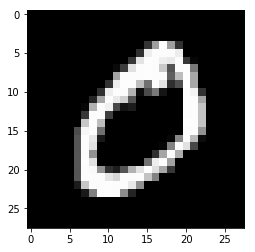

In [9]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))  # the cmap argument allows us to view this as a grayscale image

Based on the visualization above we as humans, can clearly see that this is the number 0. We can take a look at the label as well to check that the image is labeled correctly.

In [10]:
y_train[1]

0

Let's do the same for another image.

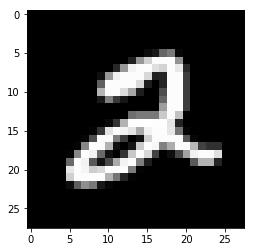

In [11]:
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))

In [12]:
y_train[5]

2

## What is Deep Learning? What are Neural Networks?
Deep learning is a subfield of machine learning focused on using biologically-inspired models known as **neural networks** to solve a wide range of machine learning problems. At a high-level, neural networks are basically **mathematical models** that are based roughly on neurological concepts in **human learning**. 

## The Three Key Components of Neural Networks
Neural networks can be a slightly challenging concept to grasp since they involve a mix of ideas from math, computer science, and even neuroscience. There is a lot of technical information in this workshop, so I would recommend focusing on gaining a high-level understanding of **three fundamental components** of neural networks:

1. **Structure** - what the neural network looks like, including all the mathematical functions involved, the number of inputs and outputs, and the parameters, called **weights** that the network has to learn.
    
2. **Loss Function** - a metric that tells us how good or bad the network's predictions are. 
3. **Optimizer** - the algorithm used for **learning the weights** that give the network the best predictions.


## Structure of Neural Networks - A Biology and Math Lesson
As we mentioned before neural networks are **biologically inspired** models. For a moment, let's forget about machine learning and review how the human nervous system works to understand where the concept of neural networks came from. A **neuron**, the fundamental unit of this system, looks something like this:

<img src='./images/neuron.png' width="400" height="200"/>
(image source: http://home.agh.edu.pl/~vlsi/AI/intro/)

### Key Parts of the Neuron
A neuron transmits electrical signals that are constantly activated as the human brain learns and recognizes new concepts. The main parts of a neuron that we should take note of are:

- **inputs** - the neuron receives several input signals through **dendrites** from connections to neighboring neurons. 
- **synapses** - gaps between **axons** and **dendrites**. Synapses transfer signals between neurons.
- **body** - the neuron has a cell body that receives all of the incoming signals.
- **axon** - a long connection that transmits an electrical signal **output**.
- **activation threshold** - neurons fire when electrical activity exceeds a certain threshold.


### The Simplest Neural Network - The Perceptron
The perceptron, arguably the simplest neural network, was invented by psychologist Frank Rosenblatt in 1957 and looks something like this:

<img src='./images/perceptron.png' width="400" height="200"/>
(image source: http://ataspinar.com/2016/12/22/the-perceptron/)

A perceptron is basically a neural network with a single **artificial neuron**. Similar to the biological neuron, a perceptron has the following characteristics:

- **inputs** - the perceptron receives a given number of real-valued inputs (the inputs are numbers).
- **weights** - the perceptron has a weight $ w_i $ associated with each input $ x_i $. These weighted connections are like synapses and they are parameters that the perceptron must "learn".
- **weighted sum (basically a dot product)** - the inputs are multiplied by the weights and the results are added together to produce a weighted sum.
- **activation function** - the perceptron has an activation function called the unit-step function that produces an output of 1 if the weighted sum is greater than some threshold $\theta$ and -1 otherwise.

### The Math Behind the Perceptron Output
Given a vector of inputs $x = (x_0, x_1, ..., x_n) $, a set of weights $w = (w_0, w_1, ..., w_n) $, and an activation threshold $\theta$ the output of a perceptron is given by the following function:

$$ f(x) = \begin{cases} 1 & \  \mbox{if} \  w \cdot x \geq \theta  \\ -1 & \text{otherwise} \end{cases} $$

### Example with Real Numbers
<img src='./images/perceptron_example.png' width="500" height="250"/>

### What kind of problems can the Perceptron solve?
The Perceptron is designed to solve **binary classification problems**. By learning the best weights for a given problem, the Perceptron can be used to classify a set of inputs into one of two possible outputs. However, the Perceptron is very limited in scope because not only is it limited to solving binary classification problems, but it can only find the optimal weights for **linearly separable** binary classification problems. These are problems where a straight line or multi-dimensional hyperplane can simply separate the two classes.


<img src='./images/perceptron_limitation.png' width="500" height="250"/>


(image source: http://qingkaikong.blogspot.com/2016/11/machine-learning-5-artificial-neural.html)

### Deep Neural Networks - Densely Connected Hidden Layers
Deep neural networks are much more complex than the simple perceptron and feature multiple layers of neurons and several **densely connected hidden layers** between the input and output layers. Here is what a deep neural network looks like:

<img src='./images/deep_net.png' width="500" height="250"/>

Looking at the example above we can see that the neural network has an **input layer** with **three inputs**, two **hidden layers**, and an **output layer** with a **single output**.

#### What is a densely connected layer?
In a densely connected layer, each neuron from the group of neurons on the left is connected to every other neuron from the group of neurons on the right. In the example above, **hidden layer 1** is densely connected because every neuron from the **input layer** is connected to every neuron in **hidden layer 1**. Each connection between the layers has a numerical weight attached to it.

Here is an example with real numbers. Notice that the value in each of the output neurons is the **weighted sum** of the values from the **incoming inputs**.

 <img src='./images/hidden_layer_example.png' width="400" height="200"/>
 
 The computation that we did above is basically just a matrix multiplication.

 
#### The Sigmoid Activation Function
After multiplying the weights from the input layer by the inputs and computing the sum in each output neuron we still have one more step left to do, and that is applying an activation function to the outputs. In the Perceptron example, we used a unit-step function as our activation function, but for deep neural networks, we can introduce another activation function, called the **sigmoid or logistic function**. The function is defined mathematically by the following equation:
 
\begin{equation*}
\phi (z) = \frac {1} {1+e^{-z}}
\end{equation*}

What's special about this function is that it is really useful for representing **probabilities** since it takes **any real number as input** and **outputs a value between 0 and 1**. Take a look at a graph of the function below to see what this concept looks like:

<img src='./images/sigmoid_graph.png' width="400" height="300"/>

If we were to apply the **sigmoid activation function** to our hidden layer in the previous example, the final values would look like this:

<img src='./images/sigmoid_activation_applied.png' width="400" height="300"/>

#### The Softmax Activation Function
Another activation function, which we usually see at the final or output layer of neural networks is the **softmax activation function**. Unlike the sigmoid activation function, which takes a single value as input, the **softmax function** takes a **vector as input** and produces a **vector of the same shape as the output**. In a way, this function basically acts on an entire layer. The softmax function basically converts a vector of real values into a **probability distribution** and is useful for representing the probabilities of different classes. This function is defined mathematically below:

Given a vector $z = (z_{1}, z_{2}, ..., z_{n})$, the result of applying softmax $\sigma(z)$, is defined as:

$$ \sigma(z)_{i} = \frac{e^{z_{i}}}{\sum_{j=1}^n e^{z_{j}}}$$

In **plain english**, what the equation above really means is that to get the softmax of a vector, **we raise $e$ to the power of each value in the vector and sum up the results**. Then for each value, **we raise $e$ to the power of that value and divide it by this sum**. This process guarantees that all of the values will **sum up to 1**. (Note that the natural constant $e$, is approximately equal to 2.71828)

#### An Example with Real Numbers 
If we took the values from our output layer in the previous example before applying sigmoid and instead applied softmax, we would calculate the softmax as follows:

Our input vector is $z = \begin{bmatrix} 3 & 1.5 & 6 \end{bmatrix}$. If we calculate the sum of raising $e$ to the power of each value, we get $e^3 + e^{1.5} + e^6 \approx 427.996$. Now for each value we just raise $e$ to the power of that value and divide it by our previous sum. 

$$\frac{e^{3}}{427.996} \approx 0.04692926$$

$$\frac{e^{1.5}}{427.996} \approx 0.01047133$$

$$\frac{e^{6}}{427.996} \approx 0.94259941$$


So the final result is $\sigma(z) = \begin{bmatrix} 0.04692926 & 0.01047133 & 0.94259941\end{bmatrix}$

#### Why Softmax??
Softmax is useful because it allows us to represent probabilities. In our problem, we have ten possible digits that an image can correspond to. Sometimes there is a little bit of uncertainty involved in the category that an image belongs to and even humans can see this when we can't tell if someone has drawn a one or a seven. For this problem, we want our neural network to produce not one but **ten outputs** with each output corresponding to the **probability** of an image corresponding to a specific digit. 

### Defining the Structure of a Neural Network for the MNIST Problem
Now that we understand the parts of a deep neural network, we can design one for our problem. 

#### Inputs
Each image in the dataset is 28 x 28 pixels. Because the input for deep neural networks that we have described must vectors, we will have to flatten each image from 28 x 28 pixels to a vector of 784 pixel values. 

<img src='./images/MNIST-flatten.png' height="400" width="600"/>

#### Hidden Layers
Our input layer contains 784 values. We can stack two hidden layers together after this input layer, with the first one having 784 neurons and the second one having 800 neurons. We can add a sigmoid activation to each layer. After this our network design looks something like this:

<img src='./images/inputs+hidden_layers.png' height="400" width="600"/>

#### Softmax Output
Finally, we can add a densely connected output layer with 10 neurons and apply a softmax activation to it. The final network design looks like this:

<img src='./images/final_dnn_design.png'/>

### Preparing Our Data for the Neural Network
Because our original data consisted of just single values for the labels, we now want to turn our labels into categorical **one-hot vectors** with 10 values. In a **one-hot vector** all of the elements are zero except for one which has a value of 1 in the position of the correct class. Let's perform this transformation with Keras and see the result on a single variable.

In [13]:
y_train[1]

0

In [14]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Building the Structure of a Deep Neural Network in Keras
In just eight lines of Keras code, we can build the neural network described above and print out a summary of its layers and parameters.

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flattens the 28 x 28 image into a vector of 784 pixel values
model.add(Dense(784, input_dim=784, activation='sigmoid')) # 1st hidden layer
model.add(Dense(800, activation='sigmoid')) # 2nd hidden layer
model.add(Dense(10, activation='softmax')) # final softmax output

print(model.summary())

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 1,251,450
Trainable params: 1,251,450
Non-trainable params: 0
_________________________________________________________________
None


## Loss Functions - Evaluating a Neural Network's Predictions
In the previous sections, all we did was define the structure of our neural network. Our network has over a million weights, but all of this means nothing if it can't learn the right weights for our problem. This brings us to what we can call the **Universal Deep Learning Problem**, an optimization problem that we try to solve in all supervised deep learning tasks (the term isn't actually real, I just made it up for the purpose of this workshop).

### The Universal Deep Learning Problem
Given a supervised machine learning task (eg. image classification), find a way to make the neural network **learn the weights** that allow it to make the **best predictions** of the desired outputs given inputs for that task.

### Quantifying "Best Predictions" Using a Loss Function
If we want our network to learn the weights that generate the **best predictions** we first have to quantitatively define the "goodness" or "badness" of our predictions. This is where loss functions come in. A loss function is basically a function that takes two arguments - some predicted values and the correct values, and measures **how bad** the predictions are. A **higher loss value** means **worse predictions** and a **lower loss value means better predictions**. 

### Categorical Cross Entropy - A Loss Function for Softmax Outputs
Recall that our network outputs a probability distribution with ten probabilities, one for each possible digit. The correct output, which we want ot compare our predictions with is a one-hot vector, which is basically a series of ten values with a 1 in the index of the correct digit, and 0's everywhere else. Clearly, we want to predict the highest probability for the correct digit and lower probabilities for incorrect digits. The **categorical cross entropy** function allows us to quantify the difference between the assigned probabilities and the actual labels. 

$$ crossentropy(y, \hat{y}) = - \sum_{i} y_{i} \log \hat{y_{i}}$$

In plain English, all this equation really says is that to calculate the cross entropy we take each element of $y$, the correct labels multiply it by the log of the corresponding element in $\hat y$ (our predicted probabilities) and sum up all these products and multiply by -1 to get the loss.

#### Example with Numbers
Let's say we are dealing with a binary classification task and we get $ y = [1, 0] $ and $ \hat y = [0.5, 0.5] $, meaning that we predicting an equal probability for each class. The cross entropy is then calculated like this:

$$ crossentropy(y, \hat{y}) = -[(1 \cdot \log 0.5) + (0 \cdot \log 0.5)]  \approx 0.6931$$

## Optimization Algorithms - Minimizing the Loss and Learning Weights
Every supervised deep learning problem is an optimization problem where the network has to **learn the weights** that **minimize the loss**.

### Intuition Behind Optimization Algorithms
In deep learning, optimization algorithms tend to follow the same set of steps, which are listed below:

Step 0: Set the weights to small random values.

1. Get a single sample or a batch of **training examples**.
2. Have the neural network **generate predictions** for those examples.
3. **Calculate the loss** for those predictions.
4. **Update the weights** to reduce the loss.
5. **Repeat steps 1-4** for some number of iterations or until satisfied with the neural net's performance.

The only step that really differs between different learning algorithms is step 4. This step is where most of the math is involved and it is also perhaps the most important step.

### (Stochastic) Gradient Descent - A Basic Optimization Algorithm
**Gradient descent** is one of the simplest optimization algorithms and usually the first one that most people studying deep learning actually learn about. To understand the idea behind this algorithm picture a scenario where you are **walking through a valley** and you are trying to get to the **lowest point** in the valley.

<img src='./images/valley.jpg' height="200" width="300"/>

Intuitively, it would make sense to look at where the path in front of you is headed and keep walking downhill rather than uphill to try to reach the bottom of the valley. This is sort of how gradient descent works. If we relate this concept back to the **universal deep learning problem**, the valley becomes the **graph of our cost function** and we can use a little bit of calculus to figure out if the cost function is going **downhill** or **uphill**.

#### Math Review - Derivatives
If we want reach the **bottom of the valley** or the **minimum value** of our **cost function**, we have to know whether our cost function is currently decreasing or increasing and **how fast** this decrease or increase is occurring. **Derivatives** allow us to actually do this. Finding the **derivative** of a function is like finding the slope of that function at an instantaneous point. Imagine that you are riding a bike or driving a car and at exactly 4:00 pm you use a speedometer to find your velocity. The reading on the speedometer at that split second is basically your **instantaneous velocity**. This is different from calculating an **average velocity** by calculating the distance traveled between 4:00 pm and 6:00 pm and dividing this distance by the elapsed time.

<img src='./images/derivative_conceptual.png' height="300" width="400"/>

If you've studied calculus before, you might remember that there is both a formal definition for the derivative and a set of rules for finding the derivatives of common functions.

#### Weight Updates Using Derivatives with Gradient Descent
Let's say that we have a loss function $ L(w) $ that we can define in terms of the weights $ w $ in our neural net. Then for each training sample where we make predictions and find the loss $ L $, the gradient descent algorithm updates each weight $ w_{i} $ by an amount $ \Delta w_{i} $ :

$$ \Delta w_{i} = -\ell \frac{\partial L}{\partial w_{i}} $$

...where $\ell$ is a parameter called the **learning rate**. This parameter controls how much the weights get updated during each iteration. Typical values are less than 1, for example $ \ell = 0.01$.

Let's take a moment to understand what is going on in the update rule above. The expression $ \frac{\partial L}{\partial w_{i}} $ tells us how much the loss is changing and what direction it is moving in (think going downhill vs. going uphill). There are three basic cases for updating the weights:

**Case 1: Cost Function is Going Downhill at Given Point**

In this case $ \frac{\partial L}{\partial w_{i}} < 0$. This means that increasing the weight $w_{i}$ will likely cause the **loss function to decrease**. In this case, this also means that $\Delta w_{i} > 0$ which means we will **increase the weight** $w_{i}$.

**Case 2: Cost Function is Going Uphill at Given Point**

In this case $ \frac{\partial L}{\partial w_{i}} > 0$. This means that increasing the weight $w_{i}$ will likely cause the **loss function to increase**. In this case, this also means that $\Delta w_{i} < 0$ which means we will do the opposite and **decrease the weight** $w_{i}$.

**Case 3: Cost Function is Not Changing at Given Point**

In this case $ \frac{\partial L}{\partial w_{i}} = 0$. Going back to the analogy of the valley, this likley means that we are at the bottom of the valley, a flat point where we are neither going downhill nor uphill. So in this case we **don't change the weight** because $\Delta w_{i} = 0$

Note that we are not performing weight updates using all of the data at once for training but instead selecting **random training examples** or **batches** from the data. For this reason, the gradient descent algorithm described in this section is often called **stochastic gradient descent** or **SGD**.

#### When SGD works really well
If we have a **convex cost function with a single global minimum**, the SGD algorithm works really well! Take a look at the graph of the function below to understand this concept.

<img src='./images/parabola.png' height="300" width="300"/>

#### When just using simple SGD can go wrong
However, if we have a more complex cost function with multiple local minima, SGD might break down and leave us with a less than optimal solution.

<img src='./images/complex_cost_python_ml.png' height="400" width="500"/>
(image credit: Python Machine Learning, Sebastian Raschka)


In the graph above, we can see that SGD might get stuck in a local minimum and stop updating the weights when there is actually a much better global minimum.

### SGD + Momentum - Dealing with More Complex Loss Functions
If we take a little inspiration from physics, we can solve the problem of local minima. Let's imagine that we have a ball rolling down a hill, where the hill is basically our cost function.

<img src='./images/zorbing.jpg' height="300" width="300"/>

As the ball rolls down the hill it picks up enough momentum to basically overcome local minima. What if we added this concept of momentum to SGD?! This is exactly the reasoning behind the SGD + momentum approach.

#### Mathematical Definition of SGD with Momentum
Recall that in regular SGD we had the following weight update rule for a weight $w$:

$$ \Delta w = -\ell \frac{\partial L}{\partial w} $$

We can write this a little differently, with $w_{t+1}$ being the **new weight** at iteration $t+1$ and $w_{t}$ being the **old weight**.

$$ w_{t+1} = w_{t} - \ell \frac{\partial L}{\partial w_{t}} $$

When dealing with SGD + momentum we add another term called a **momentum term**, $m$, that also gets updated at each iteration.

$$ m_{t+1} = \rho m_{t} + \frac{\partial L}{\partial w_{t}} $$
$$ w_{t+1} = w_{t} - \ell m_{t+1} $$

In the first equation $\rho$ is another parameter often referred to as **friction**. It controls how much the momentum decays over time. A typical value is $\rho = 0.9$.

### Other Optimization Algorithms
There are many other optimization algorithms used in deep learning but we won't cover them all in great detail because they are out of the scope of this workshop. Some of the most common algorithms include:

- RMSProp
- Adagrad
- Adadelta
- Adam

Any algorithm that begins with 'Ada' is an algorithm that adapts the learning rate over time. Adam is a popular default to start with and it generally gives good results for most problems.

### Adding a Loss Function and Optimizer to the Neural Network
Now that we know about optimizers and loss functions let's add a loss function and optimizer to our deep learning model.

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Training the Neural Network
Now that we have selected an optimizer and specified a loss function in Keras we can finally start training the network. When training a network, we have to specify the following parameters:

- **Training data**: These are the first two arguments and represent the training images and the training labels. In this case these are X_train and y_train.
- **Validation data**: Some additional data to test on while training the model.
- **batch_size**: A batch is a set of shuffled training examples from the data that we use to make a single weight update. We can specify how big we want the batches to be.
- **epochs**: An epoch is a unit of training time that represents a single pass through the training data. For example, if our training data has **50,000 images** and we use a **batch size of 50**, then an **epoch** is complete after going through **1,000 batches**.

The nice thing about Keras is that we can monitor both the loss and the accuracy and see these values changing in real time during the training process! 

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s - loss: 0.3657 - acc: 0.8906 - val_loss: 0.2582 - val_acc: 0.9226
Epoch 2/5
60000/60000 [==============================] - 14s - loss: 0.2704 - acc: 0.9166 - val_loss: 0.2548 - val_acc: 0.9212
Epoch 3/5
60000/60000 [==============================] - 17s - loss: 0.2342 - acc: 0.9254 - val_loss: 0.2659 - val_acc: 0.9158
Epoch 4/5
60000/60000 [==============================] - 16s - loss: 0.2176 - acc: 0.9317 - val_loss: 0.2123 - val_acc: 0.9328
Epoch 5/5
60000/60000 [==============================] - 17s - loss: 0.1983 - acc: 0.9376 - val_loss: 0.1761 - val_acc: 0.9451


Based on the results above, we can see that the neural network achieves over 93 percent accuracy after training for less than two minutes. However, we can do even better than this and achieve human-level performance with a special type of neural network called a **convolutional neural network**.

## Convolutional Neural Networks (CNNs)
Convolutional neural networks (CNNs) are designed for image data and inspired by local regions of activity in the visual cortex. The main innovation in CNNs lies in their ability to effectively recognize patterns in spatial data. 

Recall that in the previous section we had to flatten the images and give our deep neural network 784 pixel vectors as input. However, CNNs can work with 2D input structures such as images using **convolutional layers**.

### Convolutional Layers
The **convolutional layer** is the fundamental unit of CNNs. This layer passes over local two-dimensional regions in the image and performs a **convolution** operation on each region. The **convolution** operation displayed below is similar to multiplying weights except it operates on matrices instead of vectors.

<img src='./images/conv_operation.png' height="300" width="400"/>

(image source: http://www.davidsbatista.net/blog/2018/03/31/SentenceClassificationConvNets/)

In the image above the convolution operation involves taking a **3 x 3 subsection of the input image** and multiplying it by a **3 x 3 kernel of weights** and summing the products to produce a single element in the output. This operation is kind of like a 2D dot product and is repeated by sliding the **kernel** or **convolution filter** with a fixed **stride** such as 1 pixel length, across the image until all input pixels have been covered. The GIF below demonstrates this concept:

<img src='./images/conv_stride.gif' height="400" width="400"/>

(GIF source: https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)

A convolution filter basically looks for certain **features** in an image such as corners, curves, or circles. The **output** of sliding a convolution filter across an input image is a **feature map**, which is kind of like an image in terms of its dimensionality. A single convolution layer can have **multiple filters** that each look for different features. The size of the filter (in this case 3 x 3) is often referred to as the **kernel size**.

#### ReLU Activation Function
Convolutional layers typically use the **ReLU (Rectified Linear Unit) activation function** which is really simple and represented by the following equation: $ R(z) = max(0, z) $. If we graph this function it looks like this:

<img src='./images/relu.png'/>

### Max Pooling Layers
Max pooling is another operation commonly found in CNNs. Max pooling is just a form of downsampling where we select the maximum pixel value from a 2D section of a feature map. The image below demonstrates the concept of max-pooling.

<img src='./images/maxpool.png' height="400" width="400"/>

#### Why Max Pool? 
Why do we even do downsampling with max-pooling? **François Chollet**, the author of Keras (!) gives the following explanation in **"Deep Learning with Python"**: 

“The reason to use downsampling is to reduce the number of feature-map coefficients to process, as well as to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).”

Basically, max-pooling reduces computation time and creates creates a hierarchical structure for detecting features when we stack multiple convolutional layers together.

### Structure of CNNs
Generally CNNs begin with stacks of several convolutional and max pooling layers, which are then followed by a layer that flattens the resulting feature maps into a single vector, and then a series of typical densely connected layers. 

<img src='./images/cnn_structure.png' height="500" width="500"/>

### Introducing Dropout - Controlling Overfitting
In the final dense (fully-connected layers) of a CNN, we may typically see thousands of neurons. These large layers are good at learning patterns but can sometimes learn them too well, to the point where they memorize features unique to the training data and fail to generalize to the validation data. This is called **overfitting**. We can control overfitting by introducing **dropout** into these final layers. With **dropout**, during training we randomly remove the effect of certain neurons by **setting their activations to zero**. Note that this is just as good as removing these neurons temporarily. This prevents the network from relying too much on a few specific features and forces it to learn general patterns. We can specify the probability of dropping neurons in dropout layers in Keras.

<img src='./images/dropout.png' height="400" width="400"/>

## Training a Convolutional Neural Network
Now that we know how CNNs work, let's go ahead and train one on the MNIST data.

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # adds extra dimension
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) # adds extra dimension
input_shape = (28, 28, 1)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
model = Sequential()
model.add(Conv2D(kernel_size=(3, 3), filters=32, activation='relu', input_shape=input_shape))
model.add(Conv2D(kernel_size=(3, 3), filters=32, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
model.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=512)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

As we can see, the CNN achieves over 99 percent validation accuracy after training for only 2 epochs!

## Demonstrating that this neural net actually works!
You might be thinking that there is no way that just a little bit of Keras code produced an intelligent neural net that can actually recognize digits maybe even better than humans! Let's look at our test data and make predictions on single images to make sure it actually works.

In [20]:
def classify_single_image(image):
    
    return np.argmax(model.predict(np.array([image])))

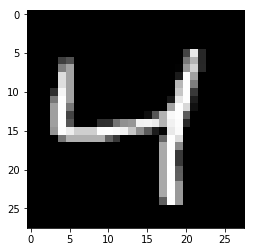

In [21]:
plt.imshow(X_train[2, :, :, 0], cmap='gray')

In [22]:
classify_single_image(X_train[2])

4

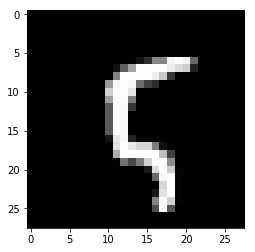

In [23]:
plt.imshow(X_train[100, :, :, 0], cmap='gray')

In [24]:
classify_single_image(X_train[100])

5

## Good Resources for Deep Learning and Machine Learning
Stanford CS231n course with lecture videos on YouTube: http://cs231n.github.io/

**Python Machine Learning** by Sebastian Raschka

**Andrew Ng's Coursera course** https://www.coursera.org/learn/machine-learning

**Machine Learning Mastery** - has a lot of good free articles with working code.

**Keras Documentation**: https://keras.io/

## Questions? 

## Contact
Amol Mavuduru

Email: axm168430@utdallas.edu
